In [33]:
# 1. Load the Dataset
import pandas as pd

# Load dataset
df = pd.read_csv("customer_data.csv")

# Displaying first few rows
print(df.head())

# Checking the shape
print("\n Shape:", df.shape)

print("\n Missing value details: ")
# Check for missing values and data types
print(df.isnull().sum())

# Checking for duplicate data
print("\n Duplicate data:", df.duplicated().sum())

# Checking for data types
print("Data types:\n", df.dtypes)

# Summary statistics
print("Summary statistics:\n", df.describe())

   CustomerID  Age  Annual Income  Spending Score
0           1   19          15000              39
1           2   21          35000              81
2           3   20          86000               6
3           4   23          59000              77
4           5   31          38000              40

 Shape: (2000, 4)

 Missing value details: 
CustomerID        0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

 Duplicate data: 0
Data types:
 CustomerID        int64
Age               int64
Annual Income     int64
Spending Score    int64
dtype: object
Summary statistics:
         CustomerID          Age  Annual Income  Spending Score
count  2000.000000  2000.000000    2000.000000     2000.000000
mean   1000.500000    48.960000  110731.821500       50.962500
std     577.494589    28.429747   45739.536688       27.934661
min       1.000000     0.000000       0.000000        0.000000
25%     500.750000    25.000000   74572.000000       28.000000
50%    1000.500000  

In [34]:
# 2. Data Preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load dataset
df = pd.read_csv("customer_data.csv")

# Drop the 'Customer ID' column
data_to_scale = df.drop(columns=["CustomerID"])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data_to_scale)

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_data, columns=data_to_scale.columns)

print(scaled_df.head())


        Age  Annual Income  Spending Score
0 -1.054089      -2.093501       -0.428339
1 -0.983723      -1.656133        1.075546
2 -1.018906      -0.540845       -1.609962
3 -0.913356      -1.131292        0.932319
4 -0.631891      -1.590528       -0.392532


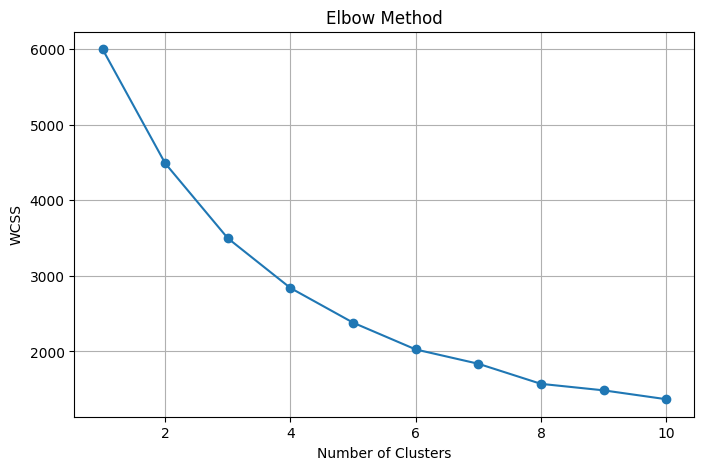

In [35]:
# 3.  Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the scaled data from previous steps
wcss = []

# Try cluster counts from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [36]:
from sklearn.metrics import silhouette_score

print("Silhouette Scores:")
for k in range(2, 11):  # silhouette score is undefined for k=1
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    print(f"→ k = {k}, Silhouette Score = {score:.4f}")


Silhouette Scores:
→ k = 2, Silhouette Score = 0.2454
→ k = 3, Silhouette Score = 0.2532
→ k = 4, Silhouette Score = 0.2641
→ k = 5, Silhouette Score = 0.2656
→ k = 6, Silhouette Score = 0.2801
→ k = 7, Silhouette Score = 0.2657
→ k = 8, Silhouette Score = 0.2757
→ k = 9, Silhouette Score = 0.2674
→ k = 10, Silhouette Score = 0.2759


In [37]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
optimal_k = 3  # <-- Replace this with the actual number from Elbow/Silhouette analysis
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)

# Fit the model and predict cluster labels
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Optional: View the first few entries with cluster labels
print(df.head())

# Store this data into a file
df.to_csv('clustered_customers.csv', index=False)


   CustomerID  Age  Annual Income  Spending Score  Cluster
0           1   19          15000              39        2
1           2   21          35000              81        2
2           3   20          86000               6        2
3           4   23          59000              77        2
4           5   31          38000              40        2


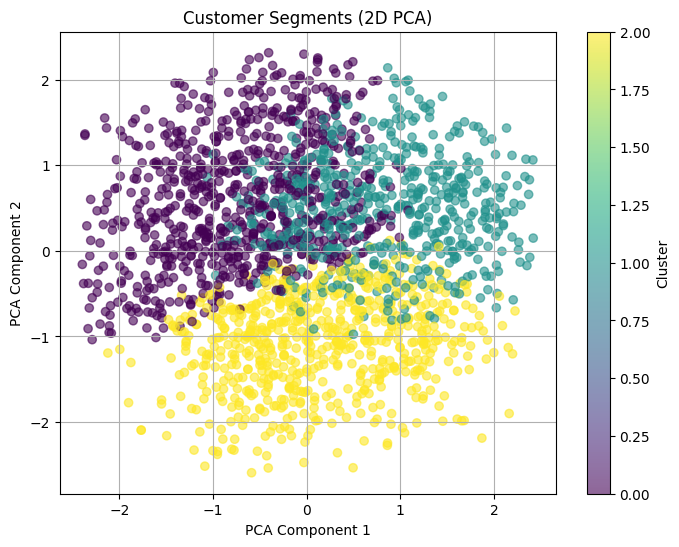

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Customer Segments (2D PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


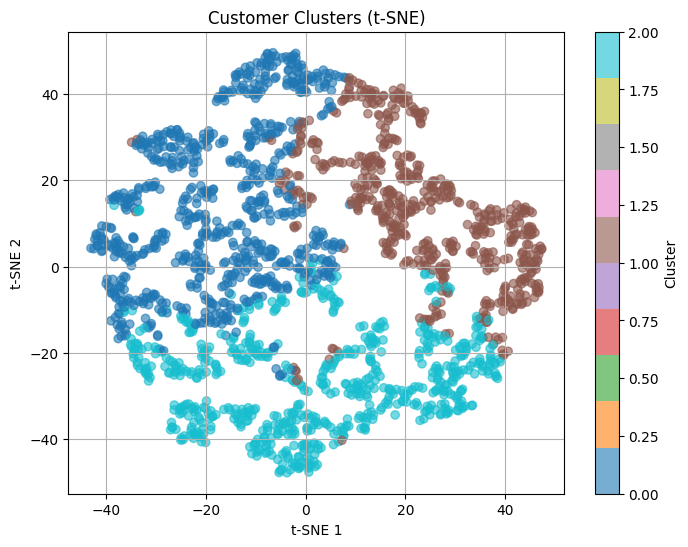

In [39]:
from sklearn.manifold import TSNE

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(scaled_data)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=df['Cluster'], cmap='tab10', alpha=0.6)
plt.title('Customer Clusters (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


<Figure size 1000x600 with 0 Axes>

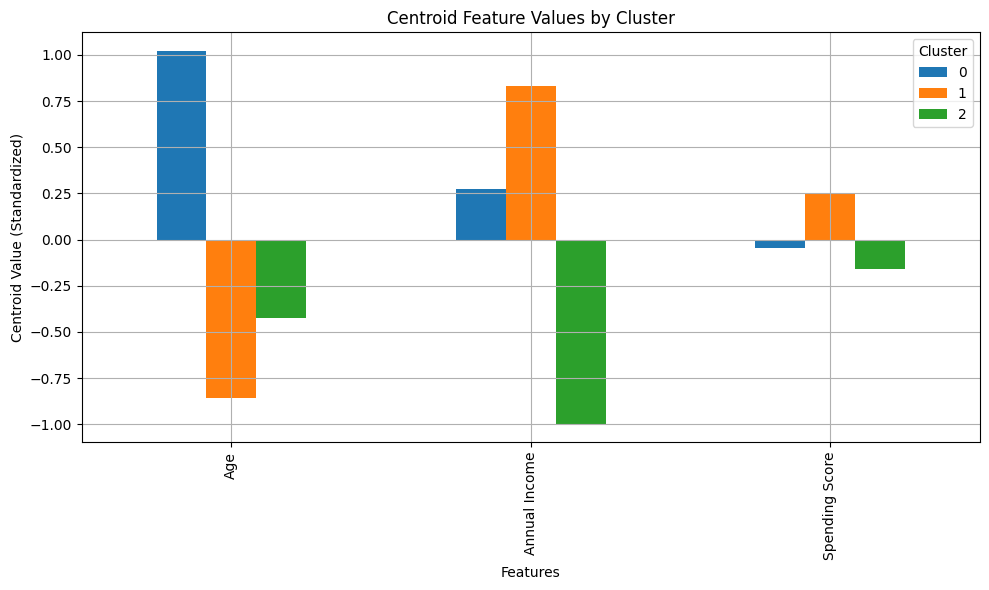

In [40]:
# Calculate centroids (on scaled data)
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=scaled_df.columns)

# Visualize using a bar plot
plt.figure(figsize=(10, 6))
centroids.T.plot(kind='bar', figsize=(10, 6))
plt.title('Centroid Feature Values by Cluster')
plt.xlabel('Features')
plt.ylabel('Centroid Value (Standardized)')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


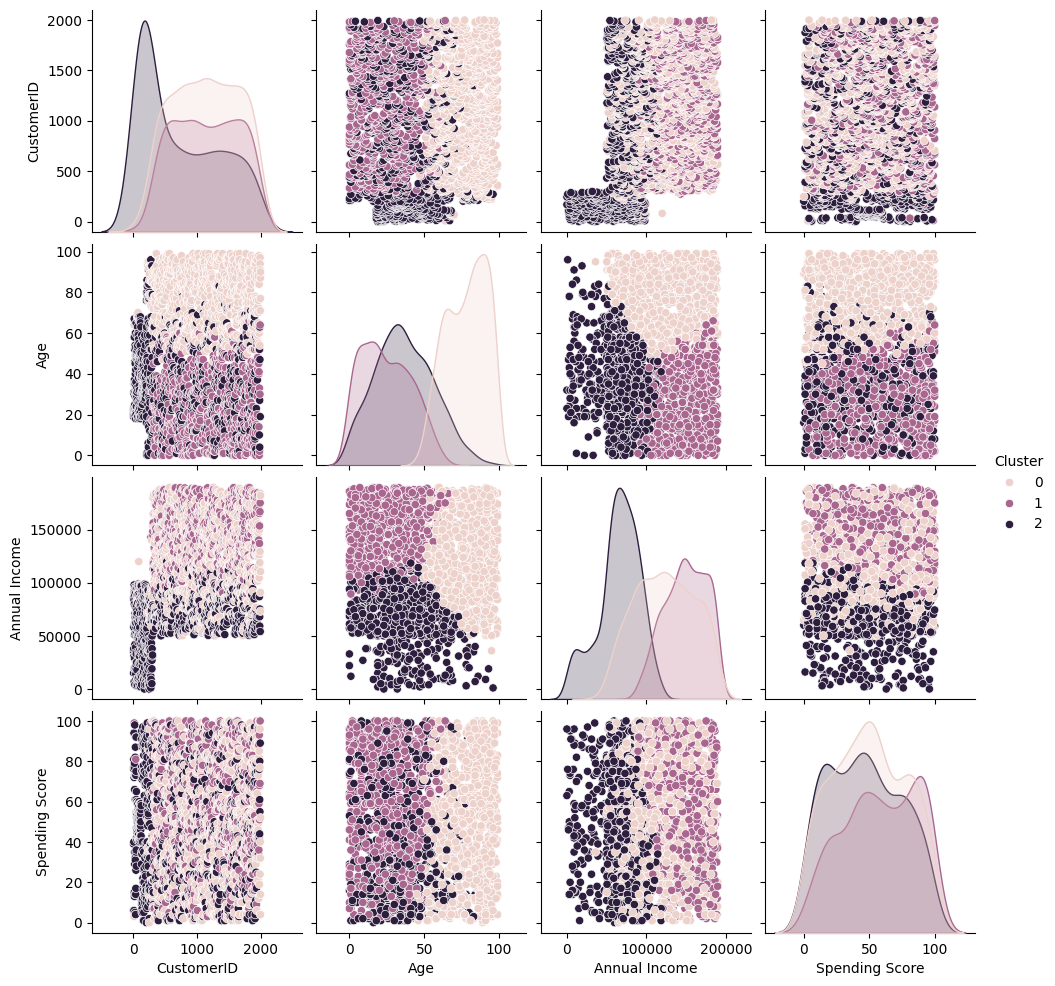

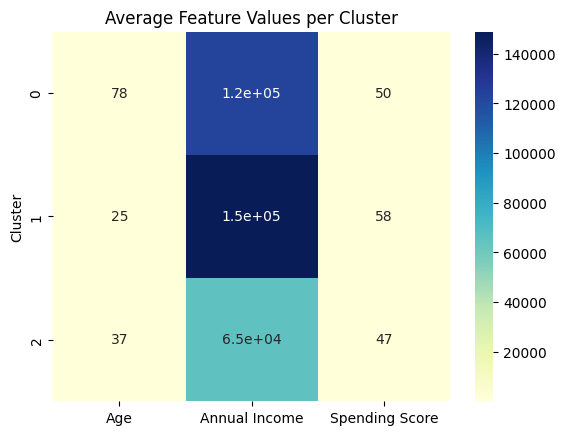

In [41]:
# Pairplot
import seaborn as sns
sns.pairplot(df, hue='Cluster', diag_kind='kde')
plt.show()

# Heatmap of average features per cluster
cluster_summary = df.groupby('Cluster')[['Age', 'Annual Income', 'Spending Score']].mean()
sns.heatmap(cluster_summary, annot=True, cmap='YlGnBu')
plt.title("Average Feature Values per Cluster")
plt.show()

